In [143]:
import tokenizers
from tokenizers import Tokenizer, decoders, models, normalizers, pre_tokenizers, trainers
from tqdm.notebook import tqdm

In [149]:
with open('../../sample_data/uniprotkb_seqs.txt', 'r') as f:
    seqs = f.readlines()

In [150]:
seqs = [seq.strip() for seq in seqs]

1. Normalizer
2. Pre-tokenize
3. Model (tokenization)
4. Post-processing (adding special tokens)


In [73]:
## Training loop
if False:
    alphabet = set()
    for s in seqs:
        alphabet.update(s)
    alphabet = list(alphabet)
    
    tokenizer = Tokenizer(models.BPE())
    tokenizer.normalizer = normalizers.Sequence([normalizers.NFD(), normalizers.StripAccents()])
    tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()
    tokenizer.decoder = decoders.ByteLevel()
    trainer = trainers.BpeTrainer(
        initial_alphabet = alphabet,
        vocab_size=1000,
        show_progress = True,
        special_tokens=[]
    )
    
    tokenizer.train_from_iterator(seqs, trainer=trainer)
    tokenizer.save('20240716_uniprotseq_config.json',True)

In [145]:
# read tokenizer from file
tokenizer = Tokenizer(models.BPE())
tokenizer = tokenizer.from_file("20240716_uniprotseq_config.json")

In [144]:
# check if tokenizer regenerates everything properly, and it does
if False:
    for seq in tqdm(seqs):
        enc = tokenizer.encode(seq)
        out = tokenizer.decode(enc.ids).strip()
        if out == seq:
            pass
        else:
            print(seq)
            break
    

  0%|          | 0/571282 [00:00<?, ?it/s]

In [153]:
lens = [len(s) for s in seqs]
lens_enc = [len(tokenizer.encode(s).ids) for s in seqs]

In [154]:
import matplotlib.pyplot as plt

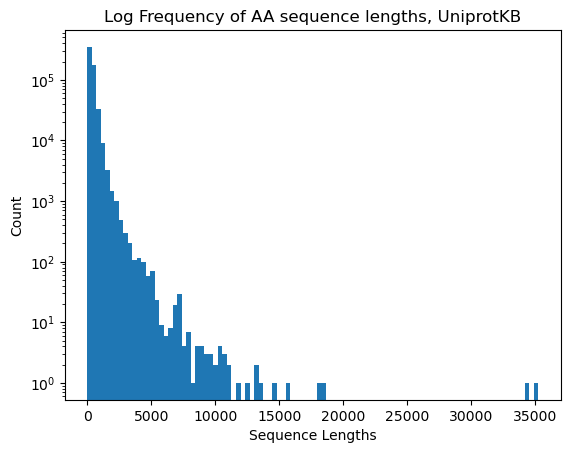

In [159]:
plt.hist(lens, bins = 100, log = True)
plt.title('Log Frequency of AA sequence lengths, UniprotKB')
plt.xlabel("Sequence Lengths")
plt.ylabel("Count")
plt.show()

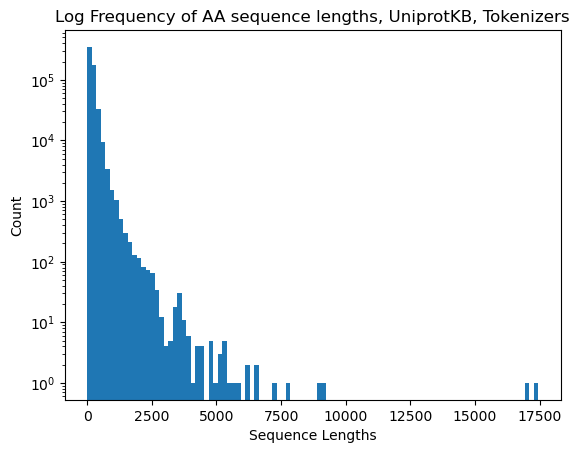

In [160]:
plt.hist(lens_enc, bins = 100, log = True)
plt.title('Log Frequency of AA sequence lengths, UniprotKB, Tokenizers')
plt.xlabel("Sequence Lengths")
plt.ylabel("Count")
plt.show()